In [154]:
#Load Data

In [727]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [728]:
import pandas as pd
import os
def load_airbnb_data():
    csv_path = os.path.join('C:\\Users\\Ramy\\Desktop\\Entreprise\\', 'AB_NYC_2019.csv')
    return pd.read_csv(csv_path)
airbnb=load_airbnb_data()

In [802]:
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_cat
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,3
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1


In [730]:
airbnb=airbnb[["neighbourhood_group","neighbourhood","latitude","longitude","room_type","price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]]
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [731]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48701 entries, 0 to 48700
Data columns (total 11 columns):
neighbourhood_group               48701 non-null object
neighbourhood                     48701 non-null object
latitude                          48701 non-null float64
longitude                         48701 non-null float64
room_type                         48701 non-null object
price                             48701 non-null int64
minimum_nights                    48701 non-null int64
number_of_reviews                 48701 non-null int64
reviews_per_month                 38763 non-null float64
calculated_host_listings_count    48701 non-null int64
availability_365                  48701 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [732]:
airbnb["neighbourhood_group"].value_counts()

Manhattan        21527
Brooklyn         20059
Queens            5656
Bronx             1090
Staten Island      369
Name: neighbourhood_group, dtype: int64

In [733]:
 airbnb.columns[airbnb.isna().any()].tolist()

['reviews_per_month']

In [734]:
sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)]
sample_incomplete_rows.shape[0]

9938

In [735]:
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

C:\Users\Ramy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [736]:
 # Checking missing values for price
airbnb.columns[airbnb.isna().any()].tolist()

[]

In [737]:
sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)]
sample_incomplete_rows.shape[0]

0

In [738]:
sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)].head()
sample_incomplete_rows

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [739]:
# Removing rows where price is 0 since they are corrupted
airbnb = airbnb[airbnb.price != 0]

In [740]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48690.000000,48690.000000,48690.000000,48690.000000,48690.000000,48690.000000,48690.000000,48690.000000
mean,40.728955,-73.952069,142.267098,6.983036,23.345369,1.094016,7.162477,112.509222
std,0.054545,0.046134,120.677065,20.334366,44.618806,1.598942,33.019882,131.475640
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690045,-73.982980,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723010,-73.955630,105.000000,3.000000,5.000000,0.380000,1.000000,44.500000
75%,40.763130,-73.936160,175.000000,5.000000,24.000000,1.590000,2.000000,226.000000
max,40.913060,-73.712990,1200.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


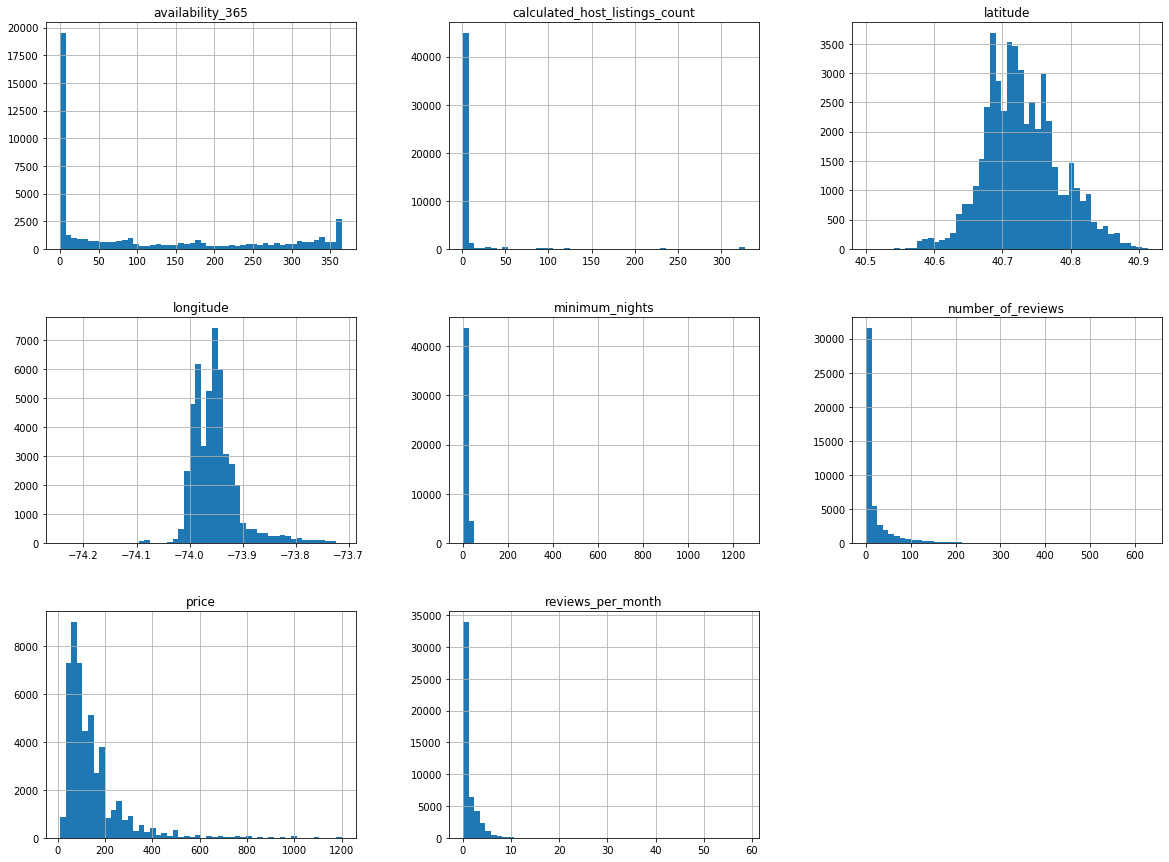

In [741]:
%matplotlib inline
import matplotlib.pyplot as plt
airbnb.hist(bins=50, figsize=(20,15))
plt.show()

In [742]:
import numpy as np


# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
np.random.seed(42)

In [743]:

train_set, test_set = split_train_test(airbnb, 0.2)
len(train_set)

38952

In [744]:
len(test_set)


9738

In [745]:

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [746]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [747]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [748]:
airbnb_with_id = airbnb.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(airbnb_with_id, 0.2, "index")

In [749]:
test_set.head()

,index,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
11,11,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,1.50,1,39
20,20,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0
23,23,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,0.61,6,304


In [750]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(airbnb, test_size=0.2, random_state=42)

In [751]:
test_set.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23740,Brooklyn,Carroll Gardens,40.67847,-73.99924,Entire home/apt,125,2,11,0.45,1,26
36786,Brooklyn,East New York,40.66957,-73.86585,Entire home/apt,300,1,12,1.49,1,175
26242,Manhattan,Murray Hill,40.74880,-73.97844,Entire home/apt,225,30,1,1.00,49,311
47533,Brooklyn,Bedford-Stuyvesant,40.69305,-73.93748,Entire home/apt,275,2,0,0.00,1,365
29212,Manhattan,Upper East Side,40.76221,-73.96726,Entire home/apt,140,1,43,2.51,11,281


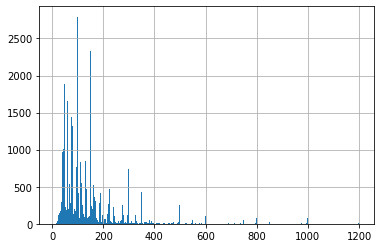

In [752]:
airbnb["price"].hist(bins=500)

In [753]:
airbnb["price_cat"] = pd.cut(airbnb["price"],
                               bins=[0, 100, 200, 300, 400, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [754]:

airbnb["price_cat"].value_counts()

1    23916
2    16583
3     5026
4     1594
5     1571
Name: price_cat, dtype: int64

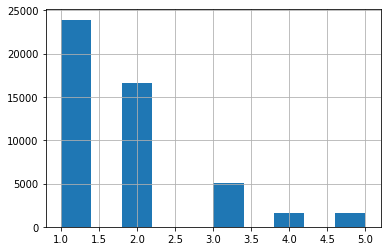

In [755]:
airbnb["price_cat"].hist()

In [756]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["price_cat"]):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]

C:\Users\Ramy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


In [757]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)


1    0.489115
2    0.342473
3    0.101561
4    0.035428
5    0.031423
Name: price_cat, dtype: float64

In [758]:
airbnb["price_cat"].value_counts() / len(airbnb)

1    0.491189
2    0.340583
3    0.103224
4    0.032738
5    0.032265
Name: price_cat, dtype: float64

In [759]:

def income_cat_proportions(data):
    return data["price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(airbnb, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(airbnb),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [760]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.491189,0.489115,0.494763,0.727546,-0.422311
2,0.340583,0.342473,0.330150,-3.063378,0.554785
3,0.103224,0.101561,0.107209,3.859928,-1.611620
4,0.032738,0.035428,0.033169,1.317440,8.218319
5,0.032265,0.031423,0.034709,7.574793,-2.609803


In [761]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

In [762]:
housing = strat_train_set.copy()

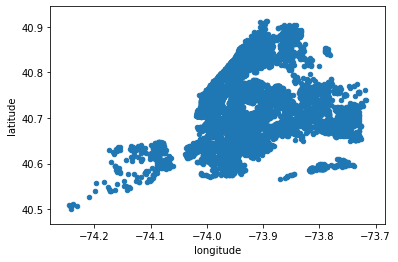

In [763]:
housing.plot(kind="scatter", x="longitude", y="latitude")

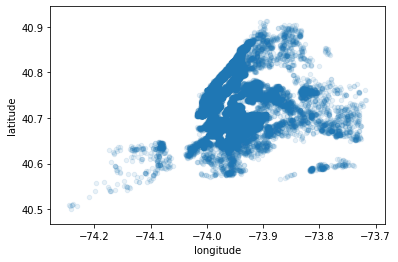

In [764]:

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


No handles with labels found to put in legend.


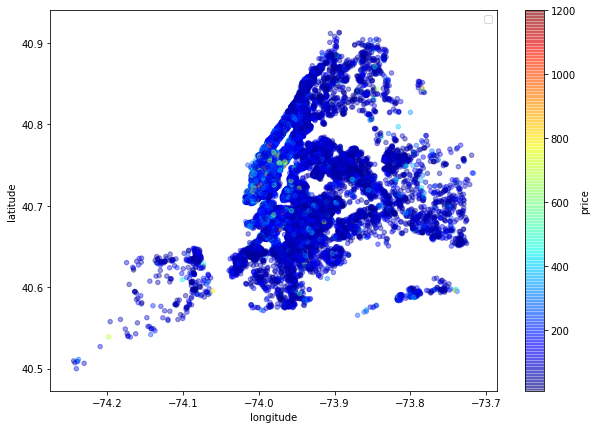

In [765]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),

    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


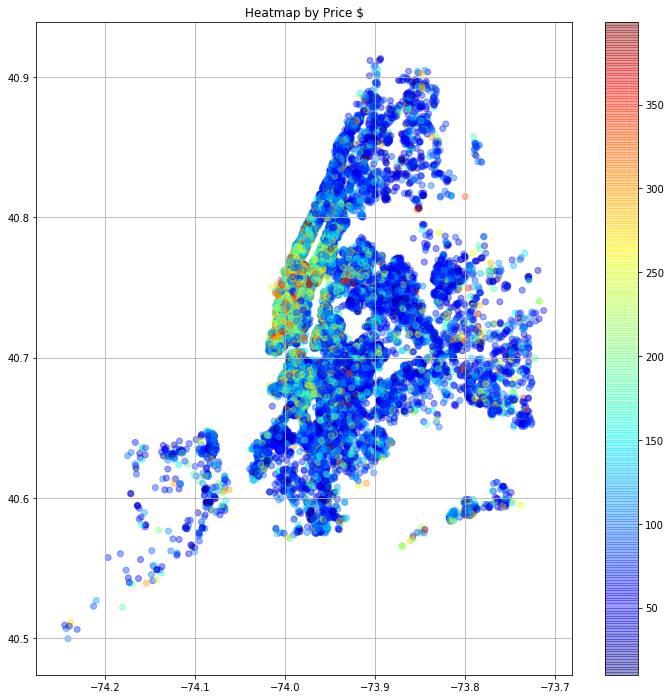

In [766]:
FILTER_PRICE_VALUE = 400 
sub_airbnb = airbnb[airbnb.price < FILTER_PRICE_VALUE]

fig, ax = plt.subplots(figsize=(12, 12))

cmap = plt.get_cmap('jet') 
c = sub_airbnb.price         
alpha = 0.5                
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c, 
                            cmap=cmap, alpha=0.4)

plt.title("Heatmap by Price $")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

In [767]:
import folium
from folium import plugins
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(airbnb[['latitude','longitude']].dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

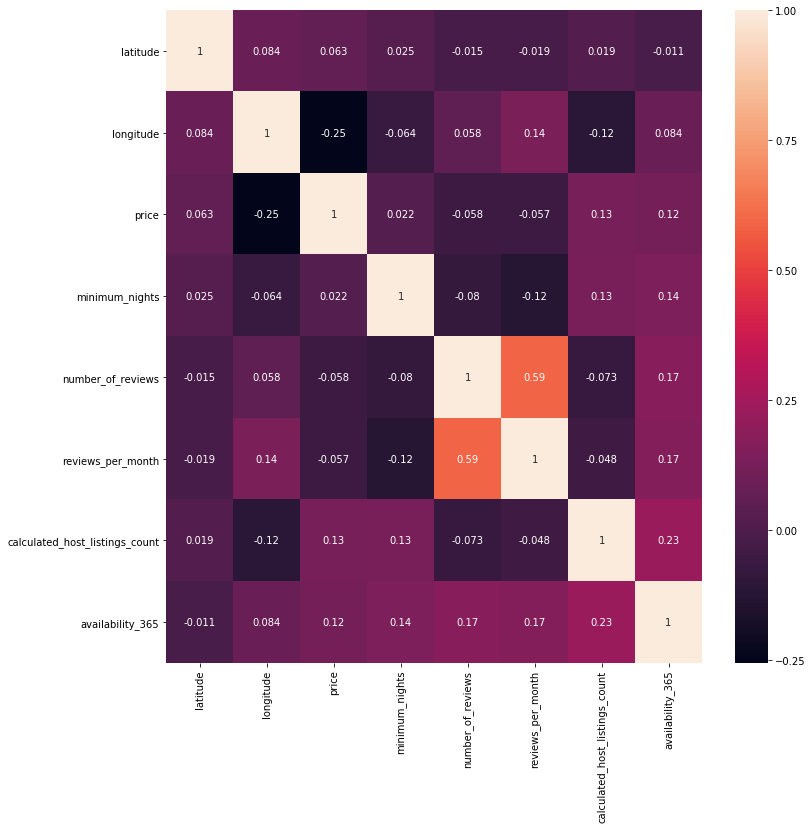

In [768]:
import seaborn as sns
corr_matrix = housing.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(airbnb.corr(),annot=True)

In [769]:
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
calculated_host_listings_count    0.120024
availability_365                  0.117524
latitude                          0.063615
minimum_nights                    0.023640
number_of_reviews                -0.056234
reviews_per_month                -0.056389
longitude                        -0.251306
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204FA361208>,
      dtype=object)

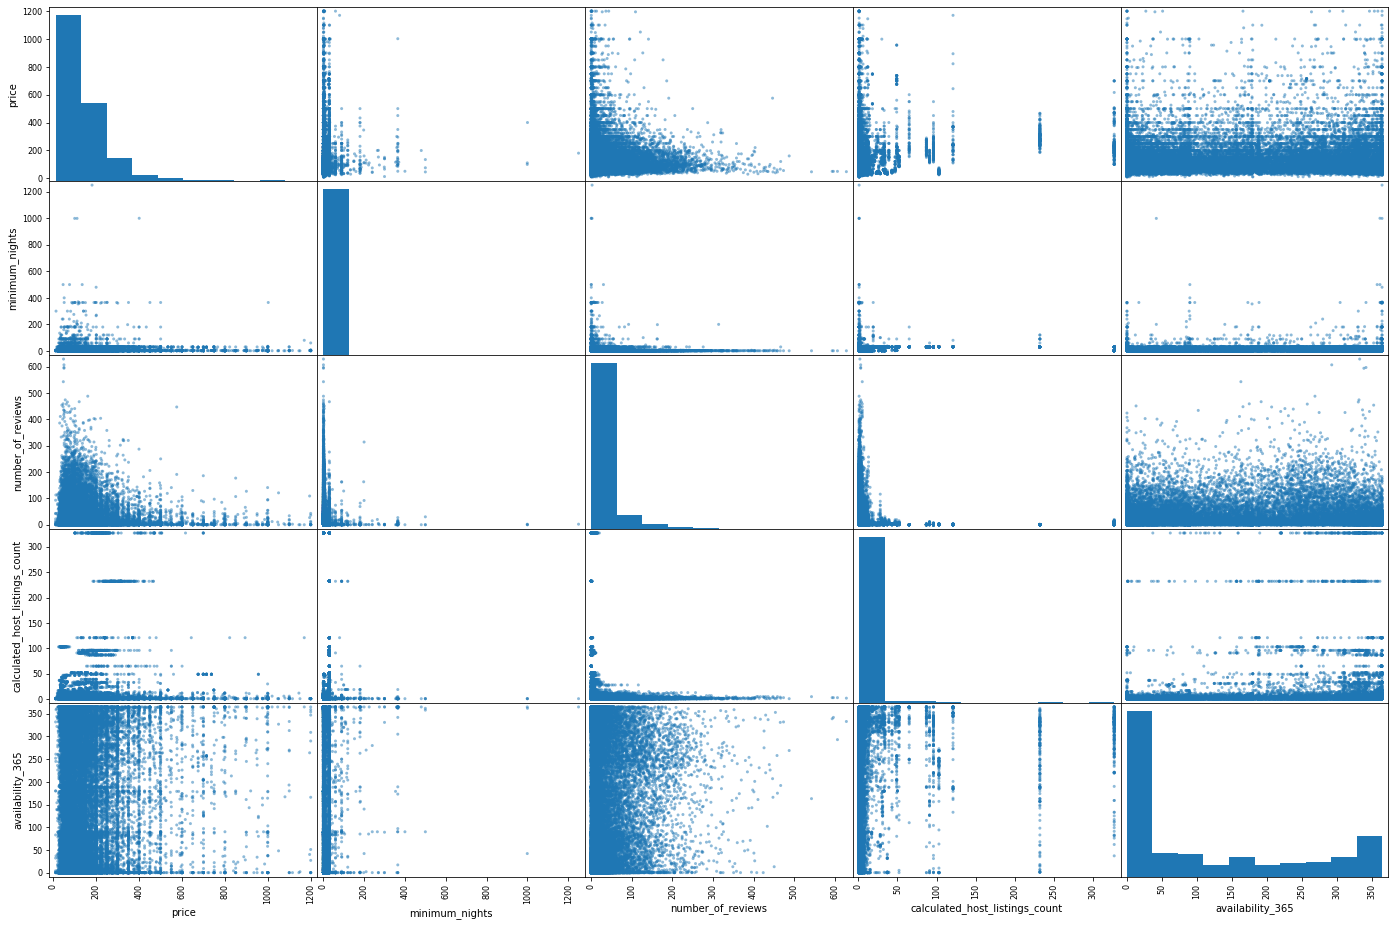

In [770]:
from pandas.plotting import scatter_matrix

attributes = ["price", "minimum_nights", "number_of_reviews",
              "calculated_host_listings_count", "availability_365"]
scatter_matrix(housing[attributes], figsize=(24, 16))


[0, 16, 10, 1000]

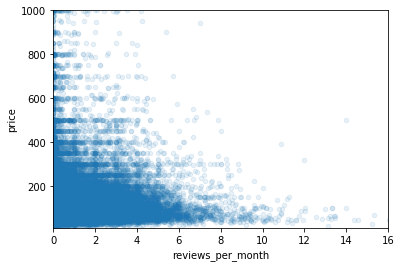

In [771]:
housing.plot(kind="scatter", x="reviews_per_month", y="price",
             alpha=0.1)
plt.axis([0, 16, 10, 1000])


In [772]:
housing
housing["Avg_number_of_reviews_per_listing"] = housing["price"]/housing["calculated_host_listings_count"]


In [773]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price                                1.000000
Avg_number_of_reviews_per_listing    0.802558
calculated_host_listings_count       0.120024
availability_365                     0.117524
latitude                             0.063615
minimum_nights                       0.023640
number_of_reviews                   -0.056234
reviews_per_month                   -0.056389
longitude                           -0.251306
Name: price, dtype: float64

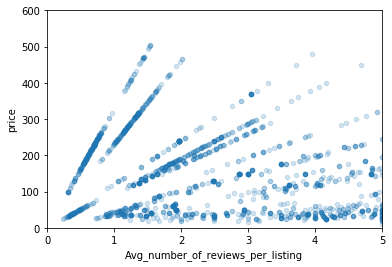

In [774]:
housing.plot(kind="scatter", x="Avg_number_of_reviews_per_listing", y="price",
             alpha=0.2)
plt.axis([0, 5, 0, 600])
plt.show()

In [775]:
housing=housing[["latitude","longitude","price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]]
housing.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38941.000000,38941.000000,38941.000000,38941.000000,38941.000000,38941.000000,38941.000000,38941.000000
mean,40.728745,-73.951992,142.283660,6.943761,23.523536,1.096345,7.062659,112.806605
std,0.054675,0.046318,120.716822,20.275557,44.985601,1.606725,32.548016,131.582010
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.689780,-73.982890,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.722830,-73.955560,105.000000,3.000000,5.000000,0.380000,1.000000,45.000000
75%,40.762990,-73.936080,175.000000,5.000000,24.000000,1.600000,2.000000,227.000000
max,40.913060,-73.716900,1200.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [776]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows.shape[0]

11

In [777]:
housing=housing.dropna()
#housing=housing.reset_index()
housing.isnull().any()

latitude                          False
longitude                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [779]:
housing = strat_train_set.drop("price", axis=1) 
housing_labels = strat_train_set["price"].copy()

In [780]:
housing=housing.dropna()
housing=housing.reset_index()
housing.isnull().any()
housing_cat = housing[["neighbourhood_group","neighbourhood","room_type"]]
housing_cat.head(10)

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Williamsburg,Entire home/apt
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Chelsea,Entire home/apt
3,Manhattan,Upper West Side,Entire home/apt
4,Manhattan,Stuyvesant Town,Private room
5,Manhattan,Midtown,Entire home/apt
6,Manhattan,Chinatown,Private room
7,Manhattan,Financial District,Entire home/apt
8,Brooklyn,Crown Heights,Private room
9,Bronx,Castle Hill,Private room


In [781]:
sample_incomplete_rows2 = housing_cat[housing_cat.isnull().any(axis=1)]
sample_incomplete_rows2

,neighbourhood_group,neighbourhood,room_type


In [782]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[  1., 213.,   0.],
       [  2., 127.,   0.],
       [  2.,  34.,   0.],
       [  2., 201.,   0.],
       [  2., 187.,   1.],
       [  2., 127.,   0.],
       [  2.,  35.,   1.],
       [  2.,  73.,   0.],
       [  1.,  51.,   1.],
       [  0.,  32.,   1.]])

In [783]:
ordinal_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria',
        'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace',
        'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater',
        'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont',
        'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park',
        'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale',
        'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick',
        'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
        'Castleton Corners', 'Chelsea', 'Chinatown', 'City Island',
        'Civic Center', 'Claremont Village', 'Clason Point', 'Clifton',
        'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point',
        'Columbia St', 'Concord', 'Concourse', 'Concourse Village',
        'Coney Island', 'Corona', 'Crown Heights', 'Cypress H

In [784]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<38941x227 sparse matrix of type '<class 'numpy.float64'>'
	with 116823 stored elements in Compressed Sparse Row format>

In [785]:
housing_cat_1hot.toarray()

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [786]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [787]:
cat_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria',
        'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace',
        'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater',
        'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont',
        'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park',
        'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale',
        'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick',
        'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
        'Castleton Corners', 'Chelsea', 'Chinatown', 'City Island',
        'Civic Center', 'Claremont Village', 'Clason Point', 'Clifton',
        'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point',
        'Columbia St', 'Concord', 'Concourse', 'Concourse Village',
        'Coney Island', 'Corona', 'Crown Heights', 'Cypress H

In [788]:
housing=housing.dropna()
#housing=housing.reset_index()
housing.isnull().any()

index                             False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [536]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.impute import SimpleImputer

#housing_num = housing.drop(housing_cat, axis=1)

#num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

#housing_num_tr = num_pipeline.fit_transform(housing_num)

In [789]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
housing_num = housing[["latitude","longitude","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]]

housing_num.isnull().isna().sum()
housing_num= housing_num.reset_index()
housing_num.isnull().isna().sum()

index                             0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [790]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [791]:
housing_num_tr

array([[-1.73200633, -0.23346724,  0.19414498, ..., -0.02673711,
        -0.0801168 , -0.3544478 ],
       [-1.73191737,  0.45808593, -0.26636961, ..., -0.12792038,
        -0.56810644, -0.3980684 ],
       [-1.73182841,  0.19287776, -1.03432574, ..., -0.22588297,
        -0.62445629, -0.39905978],
       ...,
       [ 1.73182841,  0.68049499, -0.7473947 , ..., -0.02673711,
        -0.62445629, -0.39905978],
       [ 1.73191737, -0.38106931, -1.15415021, ..., -0.22821182,
        -0.62149792, -0.39700866],
       [ 1.73200633, -0.64828941,  0.94482911, ...,  0.5725792 ,
        -0.57712242, -0.38914601]])

In [792]:
housing=housing.dropna()



In [658]:
#housing_num = [["latitude","longitude","minimum_nights","number_of_reviews","last_review","reviews_per_month","calculated_host_listings_count","availability_365"]]

In [793]:
print(housing_num.shape[0],housing_cat.shape[0])

38941 38941


In [794]:
housing_num

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

In [795]:
from sklearn.linear_model import LinearRegression
housing_labels=housing_labels.dropna()
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [796]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [183.1263455  294.36063927 243.00716414 212.75089544 110.11723241]


In [671]:
print("Labels:", list(some_labels))

Labels: [240.0, 312.0, 179.0, 172.0, 350.0]


In [672]:
some_data_prepared

<5x238 sparse matrix of type '<class 'numpy.float64'>'
	with 70 stored elements in Compressed Sparse Row format>

In [579]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

95.90928037072337

In [673]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

18.449445585742897

In [674]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [583]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [675]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [676]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [130.47909546 127.02933263 128.74717125 117.06406527 122.38092648
 120.808993   131.65317427 123.7048943  129.40701746 124.48074791]
Mean: 125.57554180142488
Standard deviation: 4.448641194439047


In [677]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [101.79780364 101.50788329  91.79518382  91.00302204  96.9830871
  94.40071449  98.56608016  94.39482129  97.2125825   96.67014191]
Mean: 96.43313202313834
Standard deviation: 3.4544250862981536


In [678]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [679]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

33.33098156268585

In [680]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [96.24780853 96.10605553 85.36152959 82.66768806 88.19293841 87.68325862
 92.78694523 87.7799951  89.34561247 89.39670307]
Mean: 89.55685346011879
Standard deviation: 4.144319981088503


In [681]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean      96.433132
std        3.641284
min       91.003022
25%       94.396295
50%       96.826615
75%       98.227706
max      101.797804
dtype: float64

In [682]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

101.18398544357916

In [683]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [684]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [685]:

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [686]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

105.34904051169032 {'max_features': 2, 'n_estimators': 3}
94.87122655451495 {'max_features': 2, 'n_estimators': 10}
91.6318737676842 {'max_features': 2, 'n_estimators': 30}
105.17071426660007 {'max_features': 4, 'n_estimators': 3}
94.78336218026452 {'max_features': 4, 'n_estimators': 10}
91.67145078674363 {'max_features': 4, 'n_estimators': 30}
105.5978286694943 {'max_features': 6, 'n_estimators': 3}
94.65334215201426 {'max_features': 6, 'n_estimators': 10}
91.18504894216213 {'max_features': 6, 'n_estimators': 30}
104.98711212885827 {'max_features': 8, 'n_estimators': 3}
94.34216311357333 {'max_features': 8, 'n_estimators': 10}
91.20837424264548 {'max_features': 8, 'n_estimators': 30}
105.63114981279298 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
95.7649687949143 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
105.04033561763669 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
95.10262257775592 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [687]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.315879,0.043500,0.008767,0.000726,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-11981.346072,-10322.991452,...,-11098.420337,550.633183,15,-2667.549756,-2840.146338,-2737.930136,-2900.914775,-2818.063413,-2792.920883,81.568343
1,4.568579,0.140559,0.027856,0.006358,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-9903.617446,-8240.829040,...,-9000.549628,559.124669,8,-1513.407146,-1668.836740,-1615.467279,-1632.019898,-1631.853083,-1612.316829,52.454604
2,13.953110,0.348743,0.075213,0.004212,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-9505.257363,-7486.407089,...,-8396.400290,654.301999,3,-1215.139756,-1301.019401,-1263.609229,-1262.310064,-1262.277668,-1260.871224,27.257250
3,1.416227,0.020029,0.009181,0.000974,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-12186.455871,-10521.904666,...,-11060.879139,586.963661,14,-2679.409944,-2930.506825,-2618.187089,-2806.980152,-2831.675207,-2773.351843,111.473178
4,4.645186,0.060991,0.023355,0.000484,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-10232.248327,-7992.681471,...,-8983.885746,724.548917,7,-1509.417943,-1654.441591,-1615.800372,-1577.550518,-1657.451712,-1602.932427,55.100509
5,14.197236,0.596831,0.066031,0.000395,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-9494.737147,-7473.568177,...,-8403.654889,650.987771,4,-1201.341013,-1276.141957,-1263.983198,-1243.147049,-1259.602865,-1248.843216,25.996600
6,1.358783,0.028687,0.007979,0.000001,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-11555.288798,-10306.271309,...,-11150.901420,462.983727,16,-2563.099487,-2771.996020,-2808.550819,-2821.036535,-2866.276233,-2766.191819,105.923842
7,4.567385,0.022164,0.022155,0.000733,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-9823.130885,-8043.116448,...,-8959.255181,565.028036,6,-1493.462149,-1628.607129,-1635.228697,-1610.765136,-1612.609251,-1596.134473,52.172622
8,13.625173,0.088390,0.062251,0.000475,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-9299.216014,-7283.648234,...,-8314.713151,654.697247,1,-1196.486355,-1267.491549,-1260.862390,-1257.843162,-1239.892122,-1244.515116,25.694048
9,1.392094,0.017301,0.008396,0.001340,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-12062.130982,-10050.257229,...,-11022.293713,691.848254,12,-2694.187419,-2702.885750,-2730.547110,-2880.120295,-2763.967331,-2754.341581,67.446783


In [688]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [689]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

89.71339474595126 {'max_features': 7, 'n_estimators': 180}
93.20985640395718 {'max_features': 5, 'n_estimators': 15}
90.55392097042831 {'max_features': 3, 'n_estimators': 72}
92.18109772654984 {'max_features': 5, 'n_estimators': 21}
89.86663019466228 {'max_features': 7, 'n_estimators': 122}
90.53480398813707 {'max_features': 3, 'n_estimators': 75}
90.46196044205028 {'max_features': 3, 'n_estimators': 88}
90.25216416851156 {'max_features': 5, 'n_estimators': 100}
90.25761443566591 {'max_features': 3, 'n_estimators': 150}
111.89017697476848 {'max_features': 5, 'n_estimators': 2}


In [690]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.13178629e-02, 1.05666420e-01, 1.22950446e-01, 4.16358537e-02,
       4.02516770e-02, 4.66090019e-02, 3.12815414e-02, 8.12827565e-02,
       5.12353343e-02, 4.77406071e-02, 4.39304340e-02, 1.75195634e-03,
       7.85147676e-03, 2.00900969e-02, 4.83348902e-03, 6.28889945e-04,
       6.91411932e-05, 1.60969455e-05, 2.69622376e-05, 2.48400166e-04,
       1.32720413e-03, 2.08481849e-05, 3.43637819e-04, 2.95688831e-04,
       1.72410845e-05, 1.54658789e-05, 6.62845457e-06, 7.40034072e-05,
       2.09707731e-05, 2.54512118e-03, 5.04726582e-05, 3.80933857e-05,
       3.37794888e-05, 2.43277243e-04, 2.42892244e-05, 6.07422180e-04,
       3.70384627e-04, 3.17901147e-05, 3.03129396e-04, 1.57495250e-04,
       3.43873515e-05, 9.89107029e-04, 8.50366153e-05, 1.19208902e-05,
       2.35657948e-03, 3.50756986e-05, 1.72059668e-04, 4.81791886e-04,
       1.96784002e-05, 8.89559138e-06, 3.03961339e-03, 6.52554063e-04,
       8.53356217e-04, 2.39057198e-04, 4.90707267e-05, 1.13337422e-04,
      

In [697]:
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.12295044642063399, 'longitude'),
 (0.1056664204919329, 'latitude'),
 (0.09131786294347385, 'index'),
 (0.08128275646843755, 'availability_365'),
 (0.051235334312255, 'rooms_per_hhold'),
 (0.047740607094503, 'pop_per_hhold'),
 (0.04660900193575483, 'reviews_per_month'),
 (0.043930433993285556, 'bedrooms_per_room'),
 (0.041635853717247005, 'minimum_nights'),
 (0.040251676968667355, 'number_of_reviews'),
 (0.03128154140388761, 'calculated_host_listings_count'),
 (0.020090096864287, 'Manhattan'),
 (0.00785147676088308, 'Brooklyn'),
 (0.004833489021006472, 'Queens'),
 (0.001751956337544246, 'Bronx'),
 (0.0006288899453952759, 'Staten Island')]

In [797]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

C:\Users\Ramy\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [798]:
final_rmse

90.4918301109796

In [799]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([85.50842702, 95.21476535])

In [800]:

m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(85.50842702492935, 95.21476535386257)

In [801]:

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(85.50906453778767, 95.21419282618135)